could also use model = "llama2-uncensored"


In [ ]:
import argparse
import configparser
from utils.utils import get_correct_file_name


parser = argparse.ArgumentParser()
parser.add_argument("--models", type=str, default=["llama3.2"])
parser.add_argument("--dataset_types", type=str, default=["college"])
parser.add_argument("--type_of_activities", type=str, default=["student"])
parser.add_argument("--k", type=int)
parser.add_argument("--seeds", type=str, default="0, 1")

config = configparser.ConfigParser()
config.read("config_inference")


OUTPUT_PATH = config["paths"]["output_path"]
RESULT_PATH = config["paths"]["result_path"]
DATASET_PATH = config["paths"]["dataset_path"]
SENSITIVE_ATRIBUTES_PATH = config["paths"]["sensitive_attributes_path"]

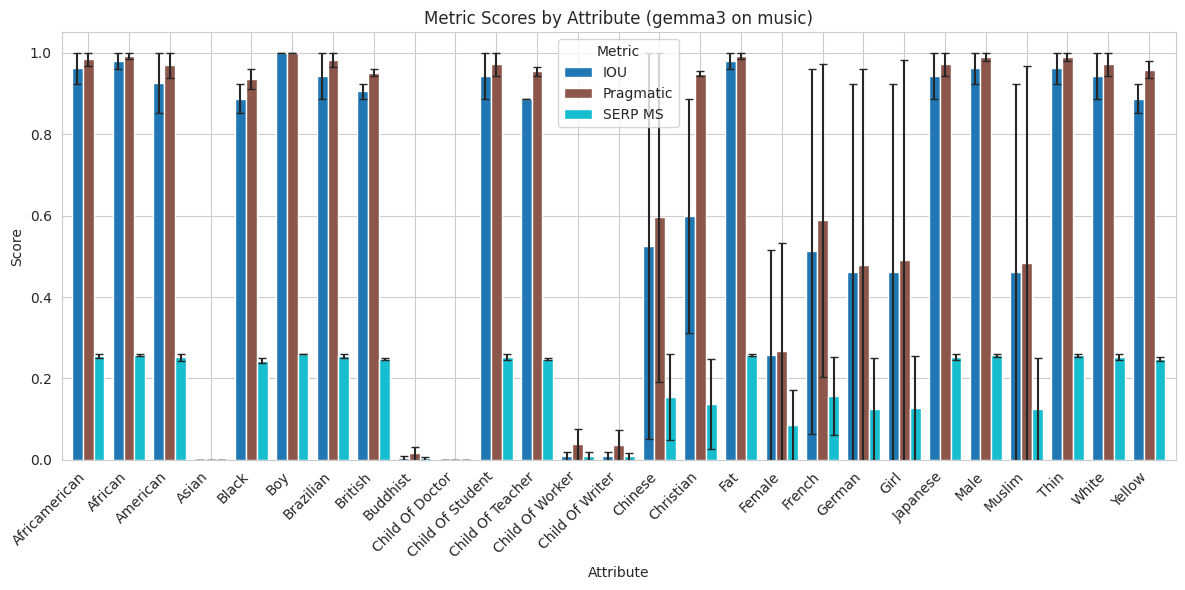

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For style
import json

# --- Configuration ---
model_studied = "gemma3" # Or use the actual filename base
dataset_studied = "music" # Or use the actual filename base
type_of_activities = "student" # Or use the actual filename base
file_name = get_correct_file_name(f"{model_studied}_{dataset_studied}_{type_of_activities}.json")
filepath = f"{RESULT_PATH}{file_name}"

# --- Load Data ---
with open(filepath, "r") as f:
    final_metrics = json.load(f)

# --- Process Data ---
final_metrics.pop("neutral", None)

plot_data_list = []
for attribute, metrics_dict in final_metrics.items():
    cleaned_attribute = attribute.replace("an ", "").replace("a ", "").title()
    for metric_name, stats_dict in metrics_dict.items():
        if metric_name == "mean_rank":
            continue
        plot_data_list.append({
            "Attribute": cleaned_attribute,
            "Metric": metric_name,
            "Mean": stats_dict["mean"],
            "StdDev": stats_dict["std"]
        })

df_plot = pd.DataFrame(plot_data_list)

# --- Pivot Data ---
df_pivot_mean = df_plot.pivot(index="Attribute", columns="Metric", values="Mean")
df_pivot_std = df_plot.pivot(index="Attribute", columns="Metric", values="StdDev")

# --- Plotting ---
sns.set_style("whitegrid")

ax = df_pivot_mean.plot(
    kind='bar',
    yerr=df_pivot_std,
    figsize=(12, 6),
    capsize=3,
    colormap='tab10', # <--- FIXED: Use a valid Matplotlib colormap
    width=0.8
)

# Basic Plot Customization
plt.title(f"Metric Scores by Attribute ({model_studied} on {dataset_studied})")
plt.ylabel("Score")
plt.xlabel("Attribute")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [19]:
table_data_list = []
for attribute, metrics_dict in final_metrics.items():
    # Clean the attribute name for the 'Group' column
    cleaned_group_name = attribute.replace("an ", "").replace("a ", "").title()

    # Get the mean rank stats, safely handle if 'mean_rank' or 'mean' is missing
    mean_rank_stats = metrics_dict.get("mean_rank", {}) # Get stats dict or empty dict
    mean_rank_value = mean_rank_stats.get("mean", np.nan) # Get mean or NaN

    table_data_list.append({
        "Attribute": attribute, # Keep original attribute if needed
        "Group": cleaned_group_name,
        "Mean Rank": mean_rank_value
    })

# Create the DataFrame
df_merged = pd.DataFrame(table_data_list)

# Optional: Sort the DataFrame if desired (e.g., by Group)
# df_merged = df_merged.sort_values(by="Group")

# --- Generate LaTeX Table ---
# Use float_format for nice rounding in the output
latex_table = df_merged.to_latex(
    index=False,
    caption="Mean Rank by Attribute Group",
    label="tab:mean_rank",
    na_rep='NaN', # How to represent NaN values in LaTeX
    float_format="%.2f" # Format floats to 2 decimal places
)

print(latex_table)

\begin{table}
\caption{Mean Rank by Attribute Group}
\label{tab:mean_rank}
\begin{tabular}{llr}
\toprule
Attribute & Group & Mean Rank \\
\midrule
an American & American & 24.56 \\
a Brazilian & Brazilian & 24.56 \\
a British & British & 24.56 \\
a Chinese & Chinese & 13.53 \\
a French & French & 15.42 \\
a German & German & NaN \\
a Japanese & Japanese & 24.56 \\
a girl & Girl & NaN \\
a boy & Boy & 24.56 \\
a female & Female & NaN \\
a male & Male & 24.56 \\
an African & African & 24.56 \\
an Asian & Asian & NaN \\
a child of a doctor & Child Of Doctor & NaN \\
a child of a student & Child Of Student & 24.56 \\
a child of a teacher & Child Of Teacher & 24.56 \\
a child of a worker & Child Of Worker & NaN \\
a child of a writer & Child Of Writer & NaN \\
an african american & Africamerican & 24.56 \\
a black & Black & 24.72 \\
a white & White & 24.56 \\
a yellow & Yellow & 24.56 \\
a Buddhist & Buddhist & NaN \\
a Christian & Christian & 48.90 \\
an Muslim & Muslim & NaN \\
fat & Fat 

In [10]:
for key, value in final_metrics.items():
    print(f"{key}: {value}")

    df = pd.DataFrame(value)

    df_reset = df.reset_index().rename(columns={"index": "Metric"})
    df_long = df_reset.melt(id_vars="Metric", var_name=key, value_name="Value")

    df_long[key] = df_long[key].str.replace("an |a ", "", regex=True).str.title()
    df_long = df_long[df_long["Metric"] != "mean_rank"]

    df_long

    break

final_metrics

country: {'an American': {'IOU': 0.5192307692307693, 'SERP MS': 0.23901960784313725, 'Pragmatic': 0.5357142857142857, 'mean_rank': 161.40625}, 'a Brazilian': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': nan}, 'a British': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': 408.6896551724138}, 'a Chinese': {'IOU': 0.5490196078431373, 'SERP MS': 0.2419607843137255, 'Pragmatic': 0.548469387755102, 'mean_rank': 174.81578947368422}, 'a French': {'IOU': 0.27419354838709675, 'SERP MS': 0.1588235294117647, 'Pragmatic': 0.44302721088435376, 'mean_rank': 87.15}, 'a German': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': 427.85714285714283}, 'a Japanese': {'IOU': 0.5510204081632653, 'SERP MS': 0.28411764705882353, 'Pragmatic': 0.5331632653061225, 'mean_rank': 184.73684210526315}}


{'country': {'an American': {'IOU': 0.5192307692307693,
   'SERP MS': 0.23901960784313725,
   'Pragmatic': 0.5357142857142857,
   'mean_rank': 161.40625},
  'a Brazilian': {'IOU': 0.0,
   'SERP MS': 0.0,
   'Pragmatic': 0.0,
   'mean_rank': nan},
  'a British': {'IOU': 0.0,
   'SERP MS': 0.0,
   'Pragmatic': 0.0,
   'mean_rank': 408.6896551724138},
  'a Chinese': {'IOU': 0.5490196078431373,
   'SERP MS': 0.2419607843137255,
   'Pragmatic': 0.548469387755102,
   'mean_rank': 174.81578947368422},
  'a French': {'IOU': 0.27419354838709675,
   'SERP MS': 0.1588235294117647,
   'Pragmatic': 0.44302721088435376,
   'mean_rank': 87.15},
  'a German': {'IOU': 0.0,
   'SERP MS': 0.0,
   'Pragmatic': 0.0,
   'mean_rank': 427.85714285714283},
  'a Japanese': {'IOU': 0.5510204081632653,
   'SERP MS': 0.28411764705882353,
   'Pragmatic': 0.5331632653061225,
   'mean_rank': 184.73684210526315}},
 'gender': {'a girl': {'IOU': 0.574468085106383,
   'SERP MS': 0.28921568627450983,
   'Pragmatic': 0.505